## Assignment 3 - Identifying spam

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [50]:
data = pd.read_csv('data.csv')
data.sample(5)

,Class,Message
1139,ham,What * u wearing?
2286,ham,"Hi, wkend ok but journey terrible. Wk not good..."
1009,ham,"Poyyarikatur,kolathupalayam,unjalur post,erode..."
5386,ham,How are you babes. Hope your doing ok. I had a...
475,ham,Nice line said by a broken heart- Plz don't cu...


In [51]:
data.shape

(5574, 2)

### Data exploration

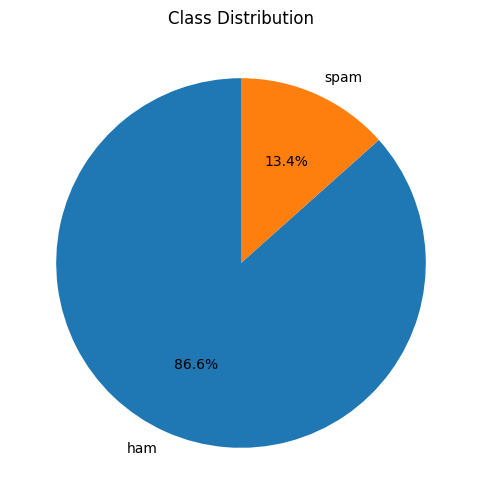

In [52]:
plt.figure(figsize=(10, 6))
plt.pie(data['Class'].value_counts(), labels=data['Class'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

We can see that there is a lot more `ham` messages than `spam` messages. This could prove tough for our model as it could become biased and miss some of the spams. Therefore we need to remember to adjust the data so that the ratio is more balanced.

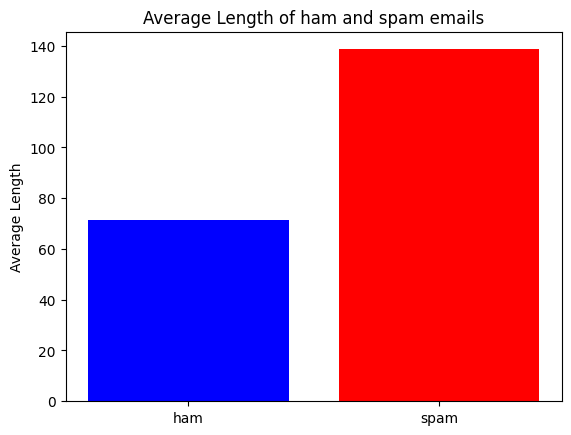

In [53]:
data['Length'] = data['Message'].apply(len)

avg_length_spam = data[data['Class'] == 'spam']['Length'].mean()
avg_length_ham = data[data['Class'] == 'ham']['Length'].mean()

plt.bar(["ham", "spam"], [avg_length_ham, avg_length_spam], color=['blue', 'red'])
plt.title('Average Length of ham and spam emails')
plt.ylabel('Average Length')
plt.show()

### Data pre-processing

From the plot above, we can see that `spam` emails are much longer on average. We created a new column for our data called `Length` as we think that it will help our model with identifying the classes better (more info = better results).

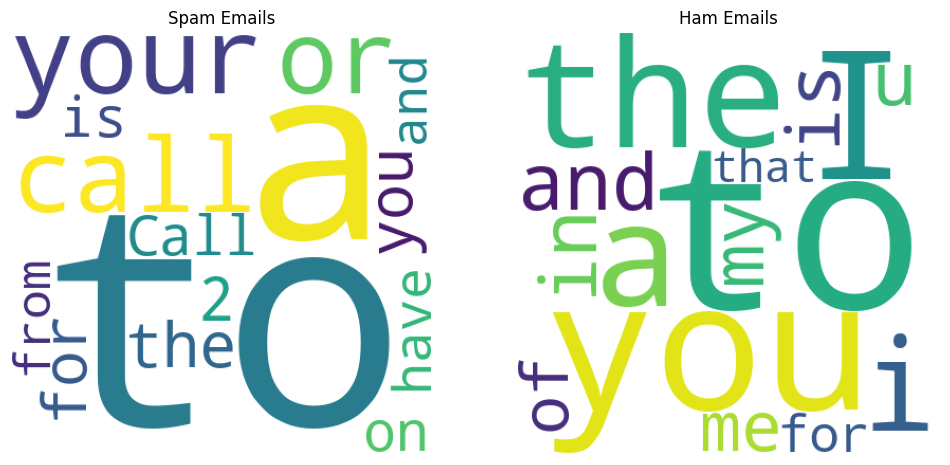

In [54]:
spam_emails = data[data['Class'] == 'spam']
ham_emails = data[data['Class'] == 'ham']

spam_words = ' '.join(list(spam_emails['Message'])).split()
spam_word_counts = Counter(spam_words)
spam_wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(spam_word_counts.most_common((15))))

ham_words = ' '.join(list(ham_emails['Message'])).split()
ham_word_counts = Counter(ham_words)
ham_wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(ham_word_counts.most_common((15))))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud)
plt.title('Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud)
plt.title('Ham Emails')
plt.axis('off')

plt.show()


In the plots above, we can see that there are multiple words that are frequent in both, spam and ham emails. This could be very confusing for our model so to make it better we will remove those words from all the messages. 

The wordswe will remove (we basically took the ones that look similarly important in both plots): 
- to
- the
- and
- a
- is

In [55]:
stopwords = ['to', 'the', 'and', 'a', 'is']

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwords])

data['transformed_message'] = data['Message'].apply(remove_stopwords)

In [56]:
data.sample(5)

,Class,Message,Length,transformed_message
2471,ham,Eat at old airport road... But now 630 oredi.....,68,Eat at old airport road... But now 630 oredi.....
2721,ham,Ok lor...,9,Ok lor...
476,ham,Ok I'm gonna head up to usf in like fifteen mi...,51,Ok I'm gonna head up usf in like fifteen minutes
1048,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,104,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
5086,ham,Hey happy birthday...,21,Hey happy birthday...


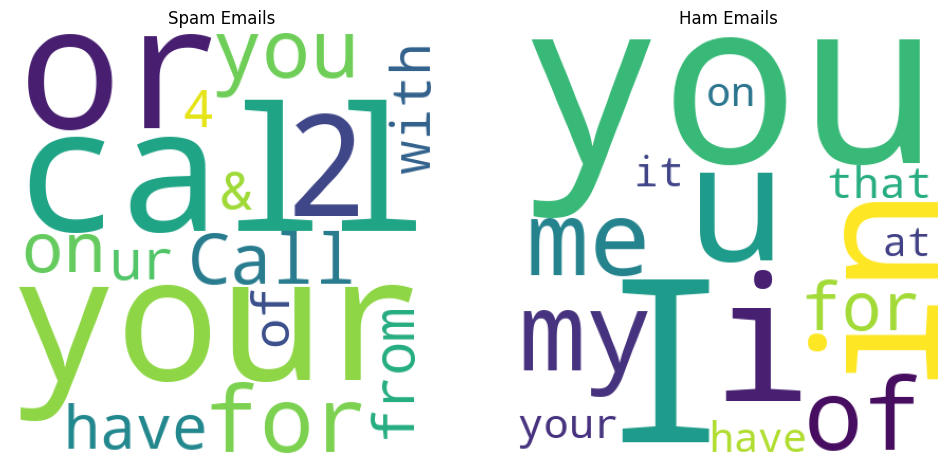

In [57]:
spam_emails = data[data['Class'] == 'spam']
ham_emails = data[data['Class'] == 'ham']

spam_words = ' '.join(list(spam_emails['transformed_message'])).split()
spam_word_counts = Counter(spam_words)
spam_wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(spam_word_counts.most_common((15))))

ham_words = ' '.join(list(ham_emails['transformed_message'])).split()
ham_word_counts = Counter(ham_words)
ham_wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(ham_word_counts.most_common((15))))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud)
plt.title('Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud)
plt.title('Ham Emails')
plt.axis('off')

plt.show()

### Model implementation